### Reading Files & Importing Libraries

In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import re
#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
# CountVectorizer will help calculate word counts
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

# spacy for lemmatization
import nltk
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# Import the string dictionary that we'll use to remove punctuation
import string
#preprocessing
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
nltk.download("stopwords")
nltk.download('wordnet')
#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tevfikerkut/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tevfikerkut/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
df = pd.read_excel("Linkedin_Scraped_Data.xlsx")

### 1- Exploratary Data Analysis & Word Counts

In [25]:
df = df.rename(columns = {"details": "text"})

In [26]:
stops = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
              'Is','If','While','This']

punct = list(string.punctuation)
punct.append("''")
punct.append(":")
punct.append("...")
punct.append("@")
punct.append('""')


## Number of words in the text ##
df["num_words"] = df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df["num_unique_words"] = df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df["num_chars"] = df["text"].apply(lambda x: len(str(x)))
## Number of stopwords in the text ##
df["num_stopwords"] = df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))
## Number of punctuations in the text ##
df["num_punctuations"] =df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df["num_words_upper"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df["num_words_title"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df["mean_word_len"] = df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df = df.drop(df.loc[(df.num_words == 0)].index).reset_index(drop = True) # removing null rows

In [27]:
df.head()

,title,company,location,link,text,Seniority level,Employment type,Job function,Industries,date,salary,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,Marketing Special Events Coordinator,Bloomingdale's,"New York, NY",https://www.linkedin.com/jobs/view/marketing-s...,About: Bloomingdale’s makes fashion personal a...,Not Applicable,Full-time,Marketing and Sales,"IT Services and IT Consulting, Retail Apparel ...",NaT,NaN,465,294,3370,104,56,1,52,6.249462
1,Program Assistant - Innovation,Biomimicry Institute,"Missoula, MT",https://www.linkedin.com/jobs/view/program-ass...,The Biomimicry Institute is a fully remote org...,Entry level,Full-time,Administrative,Internet Publishing,2023-07-06 02:43:31,NaN,984,565,7405,244,199,5,100,6.526423
2,Marketing Associate,New Balance,"Boston, MA",https://www.linkedin.com/jobs/view/marketing-a...,"Who We Are:Since 1906, New Balance has empower...",Entry level,Full-time,Marketing and Sales,Sporting Goods Manufacturing,2023-07-06 04:43:31,NaN,662,419,4885,130,106,4,65,6.380665
3,Learning & Wellness Director,Sierra Club,United States,https://www.linkedin.com/jobs/view/learning-we...,Job Title: Learning & Wellness DirectorDepartm...,Director,Full-time,Health Care Provider,Political Organizations,NaT,NaN,1427,717,10212,332,245,2,167,6.150666
4,Remote Reservation Specialist,Land Air & Sea Xperience,"New Orleans, LA",https://www.linkedin.com/jobs/view/remote-rese...,If you are searching for your next adventure i...,Entry level,Full-time,Management and Manufacturing,Internet Publishing,2023-07-06 02:43:31,NaN,287,186,2183,68,49,2,10,6.609756


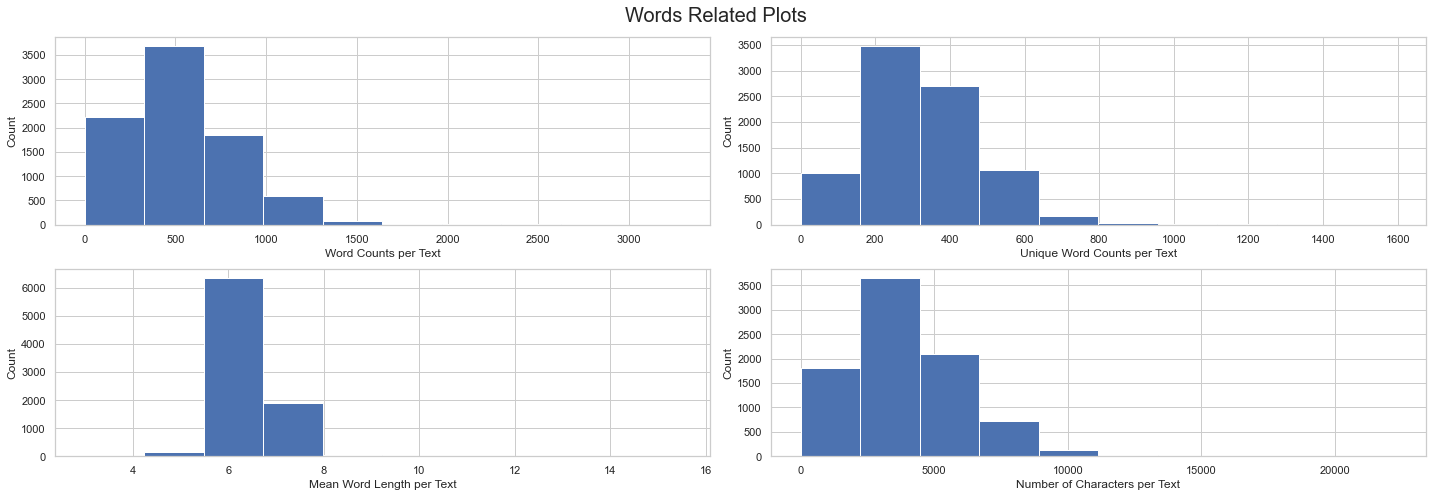

In [28]:

plt.figure(figsize=(20,7))


plt.subplot(2, 2, 1)
fig = df.num_words.hist(bins=10)
fig.set_xlabel('Word Counts per Text')
fig.set_ylabel('Count')


plt.subplot(2, 2, 2)
fig = df.num_unique_words.hist(bins=10)
fig.set_xlabel('Unique Word Counts per Text')
fig.set_ylabel('Count')


plt.subplot(2, 2, 3)
fig = df.mean_word_len.hist(bins=10)
fig.set_xlabel('Mean Word Length per Text')
fig.set_ylabel('Count')


plt.subplot(2, 2, 4)
fig = df.num_chars.hist(bins=10)
fig.set_xlabel('Number of Characters per Text')
fig.set_ylabel('Count')
plt.suptitle("Words Related Plots", fontsize = 20)
plt.tight_layout()
plt.show()

In [29]:
def cleanData(text, lowercase = False, remove_stops = False, stemming = False, lemmatization = False):
    
    txt = str(text)
    
    txt = re.sub(r'[^A-Za-z\s]',r' ',txt)
    
     
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stops])
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])
    
    if lemmatization:
        wordnet_lemmatizer = WordNetLemmatizer()
        txt = " ".join([wordnet_lemmatizer.lemmatize(w, pos='v') for w in txt.split()])

    return txt

# clean text
df['text'] = df['text'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True, stemming=False, lemmatization = True))
df = df.drop(df.loc[(df.num_words == 0)].index).reset_index(drop = True) # dropping blank rows

In [30]:
def fraction_adj(row):
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    adj_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    return (adj_count/(word_count+1))
#nltk.download('averaged_perceptron_tagger')
def fraction_noun(row):
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    
    return (noun_count/(word_count+1))

def fraction_verbs(row):
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    verbs_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    return (verbs_count/(word_count+1))

df['fraction_noun'] = df.apply(lambda row: fraction_noun(row), axis =1)
print("done")
df['fraction_adj'] = df.apply(lambda row: fraction_adj(row), axis =1)
print("done")
df['fraction_verbs'] = df.apply(lambda row: fraction_verbs(row), axis =1)

done
done


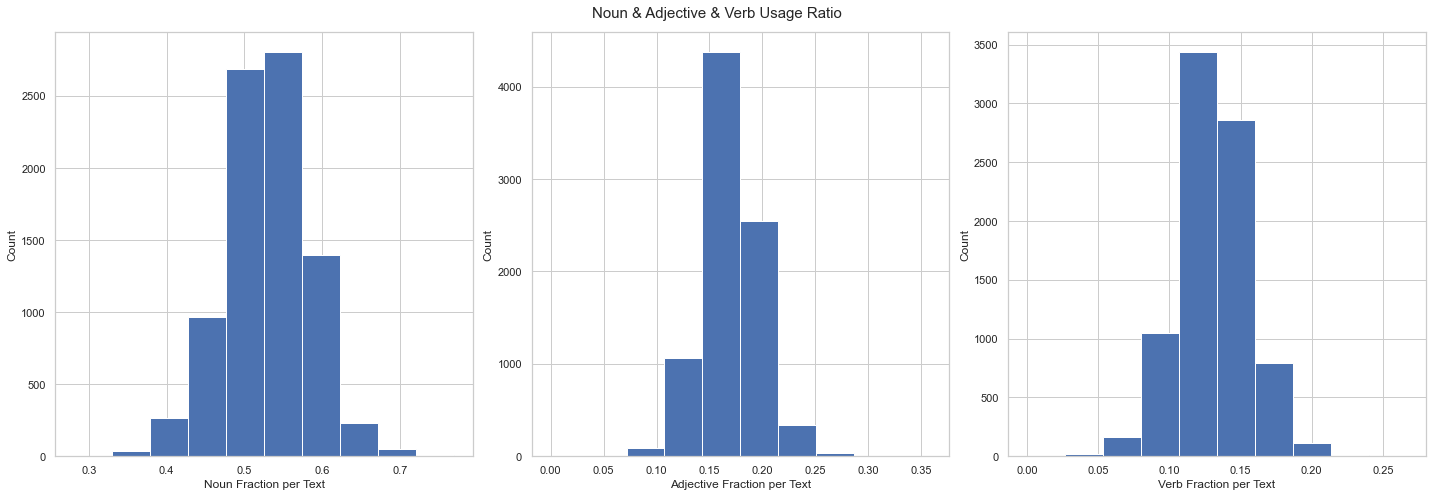

In [31]:

plt.figure(figsize=(20,7))


plt.subplot(1, 3, 1)
fig = df.fraction_noun.hist(bins=10)
fig.set_xlabel('Noun Fraction per Text')
fig.set_ylabel('Count')


plt.subplot(1, 3, 2)
fig = df.fraction_adj.hist(bins=10)
fig.set_xlabel('Adjective Fraction per Text')
fig.set_ylabel('Count')


plt.subplot(1, 3, 3)
fig = df.fraction_verbs.hist(bins=10)
fig.set_xlabel('Verb Fraction per Text')
fig.set_ylabel('Count')

plt.suptitle("Noun & Adjective & Verb Usage Ratio", fontsize =15)
plt.tight_layout()
plt.show()


In [33]:
wordcount_task = df[["title", "company", "link", "text",'num_words', 'num_unique_words', 'num_chars', 'num_stopwords',
       'num_punctuations', 'num_words_upper', 'num_words_title',
       'mean_word_len', 'fraction_noun', 'fraction_adj', 'fraction_verbs']]
wordcount_task.head()

,title,company,link,text,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len,fraction_noun,fraction_adj,fraction_verbs
0,Marketing Special Events Coordinator,Bloomingdale's,https://www.linkedin.com/jobs/view/marketing-s...,bloomingdale s make fashion personal fun aspir...,465,294,3370,104,56,1,52,6.249462,0.518717,0.189840,0.122995
1,Program Assistant - Innovation,Biomimicry Institute,https://www.linkedin.com/jobs/view/program-ass...,biomimicry institute fully remote organization...,984,565,7405,244,199,5,100,6.526423,0.527250,0.176172,0.122940
2,Marketing Associate,New Balance,https://www.linkedin.com/jobs/view/marketing-a...,who we be since new balance have empower peopl...,662,419,4885,130,106,4,65,6.380665,0.508227,0.175503,0.133455
3,Learning & Wellness Director,Sierra Club,https://www.linkedin.com/jobs/view/learning-we...,job title learn wellness directordepartment pe...,1427,717,10212,332,245,2,167,6.150666,0.502737,0.175182,0.152372
4,Remote Reservation Specialist,Land Air & Sea Xperience,https://www.linkedin.com/jobs/view/remote-rese...,you be search your next adventure in your prof...,287,186,2183,68,49,2,10,6.609756,0.436975,0.180672,0.184874


In [35]:
#wordcount_task.to_excel("Words_EDA.xlsx", index = False)

## 2- Sentiment Analysis

#### 2.1 Vader

In [25]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [37]:
analyser = SentimentIntensityAnalyzer()
neg_scores=[]
pos_scores = []
for i in range(len(df['text'])):
    
    score = analyser.polarity_scores(df['text'][i])
    score1=score['neg']
    score2 = score["pos"]
    neg_scores.append(score1)
    pos_scores.append(score2)

df['neg_score']= neg_scores
df['pos_score']= pos_scores

In [42]:
df[["title", "company", "text", "neg_score", "pos_score"]].head()

,title,company,text,neg_score,pos_score
0,Marketing Special Events Coordinator,Bloomingdale's,bloomingdale s make fashion personal fun aspir...,0.010,0.245
1,Program Assistant - Innovation,Biomimicry Institute,biomimicry institute fully remote organization...,0.031,0.200
2,Marketing Associate,New Balance,who we be since new balance have empower peopl...,0.002,0.258
3,Learning & Wellness Director,Sierra Club,job title learn wellness directordepartment pe...,0.027,0.191
4,Remote Reservation Specialist,Land Air & Sea Xperience,you be search your next adventure in your prof...,0.000,0.224


In [40]:
df.pos_score.max()

0.576

In [41]:
df.neg_score.max()

0.158

#### 2.2 TextBlob

In [43]:
from textblob import TextBlob
# Get the polarity score using below function
def get_textBlob_score(sent):
    # This polarity score is between -1 to 1
    polarity = TextBlob(sent).sentiment.polarity
    return polarity

In [44]:
scores=[]
for i in range(len(df['text'])):
    score = get_textBlob_score(df['text'][i])
    scores.append(score)
df["textblob_sentiment_score"] = scores

In [46]:
sentiment_task = df[["title", "company", "text", "pos_score", "neg_score", "textblob_sentiment_score"]]
sentiment_task.head()

,title,company,text,pos_score,neg_score,textblob_sentiment_score
0,Marketing Special Events Coordinator,Bloomingdale's,bloomingdale s make fashion personal fun aspir...,0.245,0.010,0.137360
1,Program Assistant - Innovation,Biomimicry Institute,biomimicry institute fully remote organization...,0.200,0.031,0.139256
2,Marketing Associate,New Balance,who we be since new balance have empower peopl...,0.258,0.002,0.217536
3,Learning & Wellness Director,Sierra Club,job title learn wellness directordepartment pe...,0.191,0.027,0.152561
4,Remote Reservation Specialist,Land Air & Sea Xperience,you be search your next adventure in your prof...,0.224,0.000,0.235516


In [47]:
#sentiment_task.to_excel("Words - Sentiment Analysis.xlsx", index = False)

Text(0.5, 0.98, 'Sentiment Related Scores')

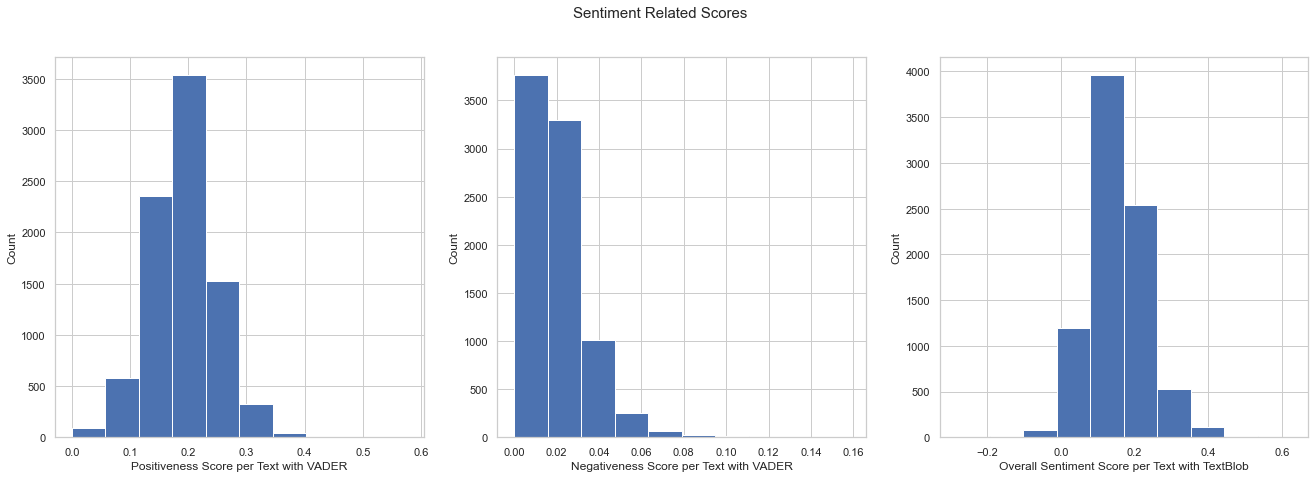

In [48]:

plt.figure(figsize=(20,7))


plt.subplot(1, 3, 1)
fig = sentiment_task.pos_score.hist(bins=10)
fig.set_xlabel('Positiveness Score per Text with VADER')
fig.set_ylabel('Count')


plt.subplot(1, 3, 2)
fig = sentiment_task.neg_score.hist(bins=10)
fig.set_xlabel('Negativeness Score per Text with VADER')
fig.set_ylabel('Count')


plt.subplot(1, 3, 3)
fig = sentiment_task.textblob_sentiment_score.hist(bins=10)
fig.set_xlabel('Overall Sentiment Score per Text with TextBlob')
fig.set_ylabel('Count')

plt.suptitle("Sentiment Related Scores", fontsize =15)


## 3.Readability

In [36]:
#!pip install textstat

In [83]:
import textstat

df = pd.read_excel("Linkedin_Scraped_Data.xlsx")
df = df.loc[(df.details.notnull())].reset_index(drop = True)
df = df.rename(columns = {"details": "text"})

In [84]:
df.head()

,title,company,location,link,text,Seniority level,Employment type,Job function,Industries,date,salary
0,Marketing Special Events Coordinator,Bloomingdale's,"New York, NY",https://www.linkedin.com/jobs/view/marketing-s...,About: Bloomingdale’s makes fashion personal a...,Not Applicable,Full-time,Marketing and Sales,"IT Services and IT Consulting, Retail Apparel ...",NaT,NaN
1,Program Assistant - Innovation,Biomimicry Institute,"Missoula, MT",https://www.linkedin.com/jobs/view/program-ass...,The Biomimicry Institute is a fully remote org...,Entry level,Full-time,Administrative,Internet Publishing,2023-07-06 02:43:31,NaN
2,Marketing Associate,New Balance,"Boston, MA",https://www.linkedin.com/jobs/view/marketing-a...,"Who We Are:Since 1906, New Balance has empower...",Entry level,Full-time,Marketing and Sales,Sporting Goods Manufacturing,2023-07-06 04:43:31,NaN
3,Learning & Wellness Director,Sierra Club,United States,https://www.linkedin.com/jobs/view/learning-we...,Job Title: Learning & Wellness DirectorDepartm...,Director,Full-time,Health Care Provider,Political Organizations,NaT,NaN
4,Remote Reservation Specialist,Land Air & Sea Xperience,"New Orleans, LA",https://www.linkedin.com/jobs/view/remote-rese...,If you are searching for your next adventure i...,Entry level,Full-time,Management and Manufacturing,Internet Publishing,2023-07-06 02:43:31,NaN


#### 3.1 the Flesch-Kincaid Grade 

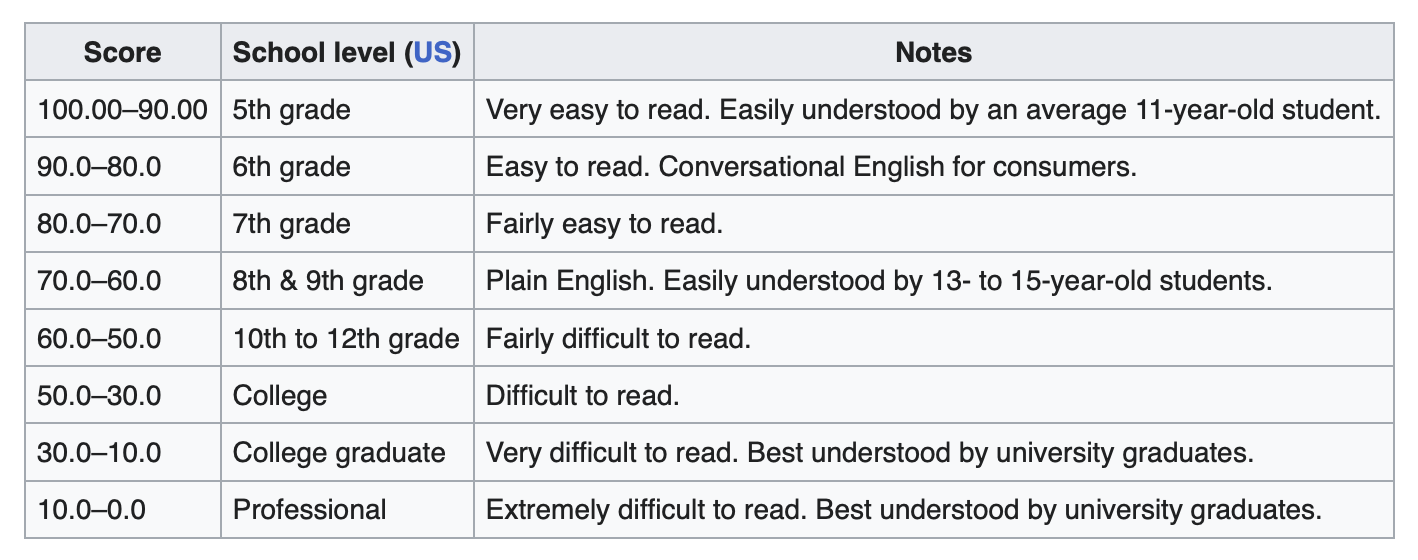

In [97]:
from IPython import display
import textstat
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)
display.Image("flesch1.png")

In [98]:
import plotly.express as px
df["flesch_kincaid_score"] = df.text.apply(lambda x : textstat.textstat.flesch_kincaid_grade(x))
fig = px.histogram(df, x="flesch_kincaid_score", title = "Histogram of Flesch-Kincaid Score")
fig.show()

#### 3.2 Smog Readability Index

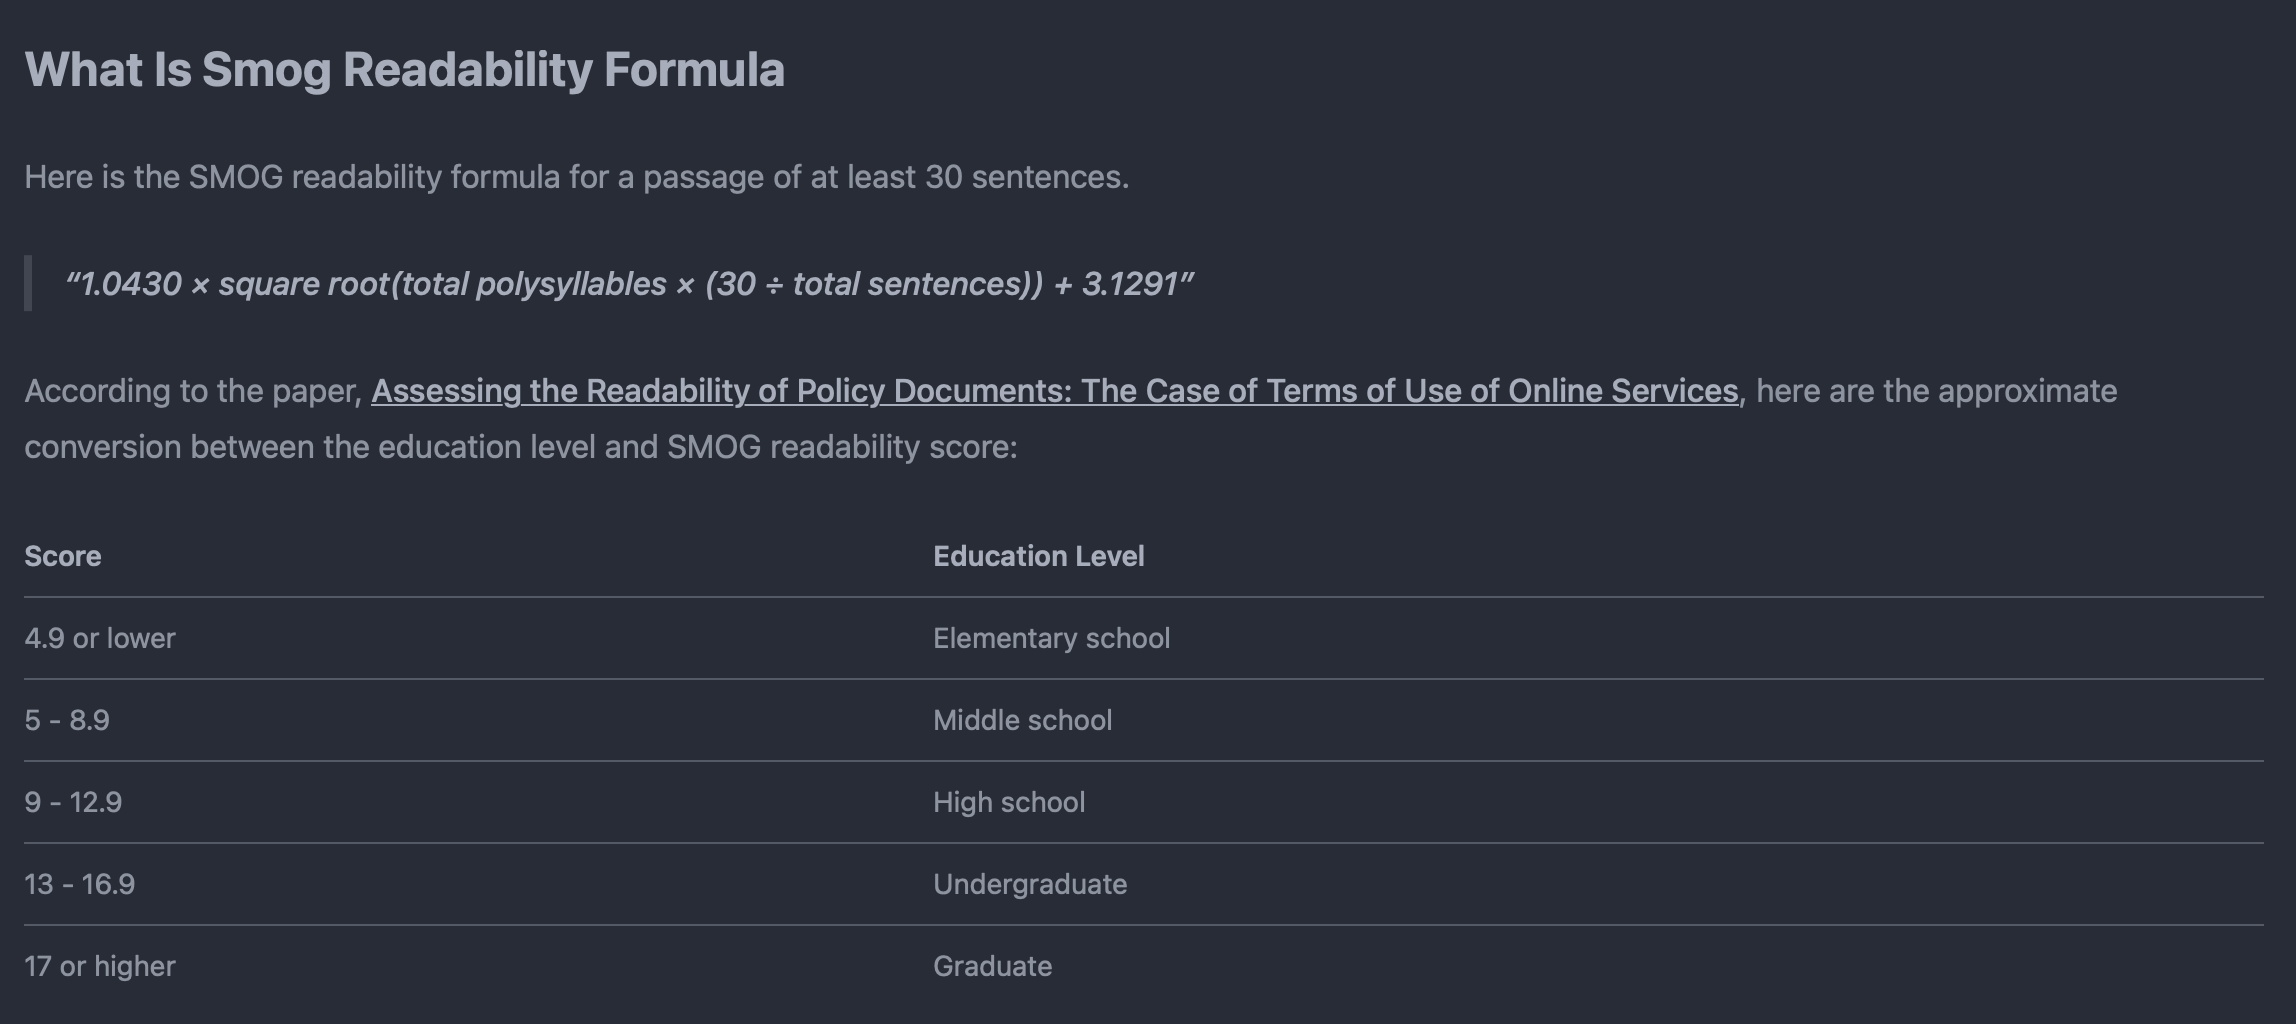

In [99]:
display.Image("smog_index.png")

In [100]:
df["smog_readability_score"] = df.text.apply(lambda x : textstat.textstat.smog_index(str(x)))
fig = px.histogram(df, x="smog_readability_score", title = "Histogram of SMOG Scores")
fig.show()

#### 3.3 ARI ( Automated Readability Index)

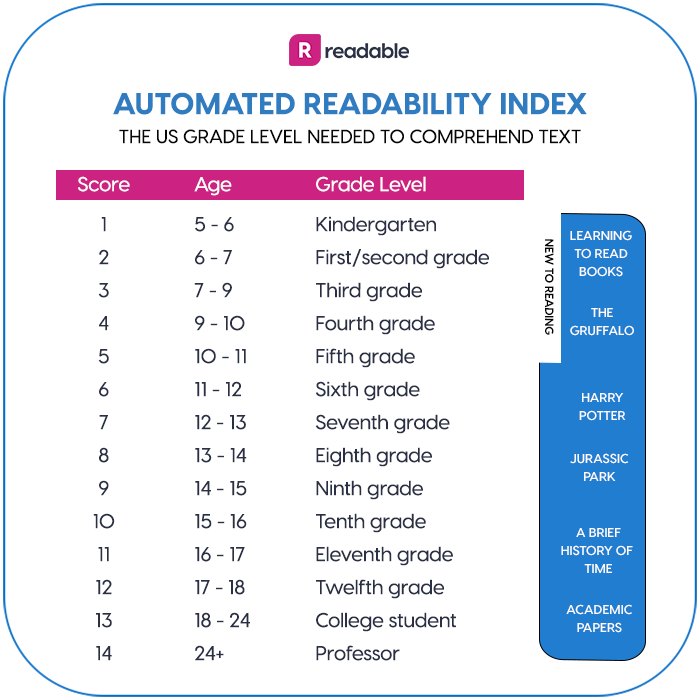

In [101]:
display.Image("ari.png")

In [102]:
df["ari_readability_score"] = df.text.apply(lambda x : textstat.textstat.automated_readability_index(x))
fig = px.histogram(df, x="ari_readability_score", title = "Histogram of ARI Scores")
fig.show()

In [103]:
readability_task = df[["title", "company", "text", "link", "flesch_kincaid_score", "smog_readability_score", "ari_readability_score"]]

In [106]:
readability_task.loc[(readability_task.smog_readability_score < 5) & (readability_task.flesch_kincaid_score < 10)]

,title,company,text,link,flesch_kincaid_score,smog_readability_score,ari_readability_score
549,Caregiver,Harmony Companion Home Caree,At least one year experience in non-medical ho...,https://www.linkedin.com/jobs/view/caregiver-a...,6.4,0.0,7.9
2221,Pre-K - 5 Teacher,Alabama State Department of Education,Please See Our Job Description At Www.dcs.edu ...,https://www.linkedin.com/jobs/view/pre-k-5-tea...,9.0,0.0,13.6
2232,Pre-K - 5 Teacher (10 positions),Alabama State Department of Education,Please See Our Job Description At Www.dcs.edu ...,https://www.linkedin.com/jobs/view/pre-k-5-tea...,9.0,0.0,13.6
5345,Project Manager,Horizontal Talent,Looking for a REMOTE Project Manager who has 3...,https://www.linkedin.com/jobs/view/project-man...,9.1,0.0,10.6
5775,PROJECT COORDINATOR,Phaxis,Must Haves - - - Plusses - - Day-to-Day,https://www.linkedin.com/jobs/view/project-coo...,3.7,0.0,17.1


In [107]:
readability_task.to_excel("Words - Readability Analysis.xlsx", index =False)